# Log Parser Notebook
Exploratory notebook for testing out parsing the logs for workflow statistics


In [1]:
%load_ext autoreload
%autoreload 2
import logging
import datetime
import time
import glob

import os
filenames = sorted(glob.glob(os.path.join(os.path.dirname(os.getcwd()), "log/run/**/*.log")))

# log_path = configure_logging(os.path.join(os.path.dirname(os.getcwd()), "log/run/123456.789"))

In [ ]:
# TODO: better logs: https://www.toptal.com/python/in-depth-python-logging
def configure_logging(save_path='', log_filename='logfile', log_level=logging.INFO):
    """Log to the terminal and to file simultaneously."""
    timestamp = datetime.datetime.fromtimestamp(time.time()).strftime(
        '%Y%m%d.%H%M%S')  # datetime.now().strftime("_%Y-%m-%d_%H-%M-%S")
    logging.basicConfig(
        format="%(asctime)s — %(name)s — %(levelname)s — %(funcName)s:%(lineno)d — %(message)s", #"%(asctime)s %(levelname)s %(message)s",
        level=log_level,
        # Multiple handlers can be added to your logging configuration.
        # By default log messages are appended to the file if it exists already
        handlers=[
            logging.FileHandler(save_path+'/'+log_filename+timestamp+'.log'),
            logging.StreamHandler(),
        ])
    return save_path+'/'+log_filename+timestamp+'.log'


### Fake Log Generator

In [ ]:
import random
# generate random log messages
supported_feature_types = ["image_centre", "lamella_centre", "needle_tip", "lamella_edge", "landing_post"]
for i in range(100):


    RANDOM_NUM = random.randint(0, 5)

    if RANDOM_NUM > 4:
        feature_type = random.choice(supported_feature_types)
        response = random.choice([True, False])
        logging.info(f"ml_detection: {feature_type}: {response}")
    elif RANDOM_NUM > 3:
        diff = random.randint(-120, 120)
        gam = random.random() * 2.0
        logging.info(f"gamma_correction: diff: {diff:.3f}: gam: {gam:.3f} ")
    
    else:
        logging.info(f"random other log message not with the same structure {random.random():.2f}")


## Log Parser

In [2]:

from LogParser import parse_log_file, plot_ml_data, plot_gamma_data
from pprint import pprint

filenames = sorted(glob.glob(os.path.join(os.path.dirname(os.getcwd()), "log/run/**/*.log")))
log_path = filenames[-1]
# log_path = r"C:\Users\Admin\Github\autoliftout\liftout\log\run\20211020.155258\logfile_20211020.155258.log"
# log_path = r"C:\Users\Admin\Github\autoliftout\liftout\log\run\20211027.160458/logfile_20211027.160458.log"
log_path = r"C:\Users\Admin\Github\autoliftout\liftout\log\run\20211027.165108/logfile_20211027.165108.log"
print(log_path)
score_dict, gamma_dict, stage_dict = parse_log_file(log_path)
pprint(score_dict)
# pprint(gamma_dict)
# pprint(stage_dict)

C:\Users\Admin\Github\autoliftout\liftout\log\run\20211027.165108/logfile_20211027.165108.log
2021-10-27 16:51:08,693 — root — INFO — __init__:81 — Initialisation STARTED
2021-10-27 16:51:08,694 — root — INFO — __init__:82 — gui: starting in online mode
2021-10-27 16:51:09,152 — root — INFO — setup_connections:1468 — gui: setup connections started
2021-10-27 16:51:09,152 — root — INFO — setup_connections:1494 — gui: setup connections finished
2021-10-27 16:51:09,153 — root — INFO — pre_run_validation:176 — Running pre run validation
2021-10-27 16:51:09,153 — root — WARNING — pre_run_validation:192 — validation_errors=['link_and_focus']
2021-10-27 16:51:09,153 — root — INFO — pre_run_validation:193 — Finished pre run validation: 1 issues identified.
2021-10-27 16:51:09,153 — root — INFO — __init__:173 — Initialisation FINISHED
2021-10-27 16:51:46,439 — root — INFO — load_coordinates:437 — LOAD COORDINATES STARTED
{'image_centre': {'False': 0, 'True': 0},
 'lamella_centre': {'False': 0, 

## Machine Learning Evaluation

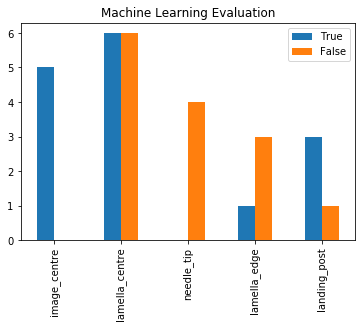

In [141]:
# eval
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: better plots and analysis

plot_ml_data(score_dict)


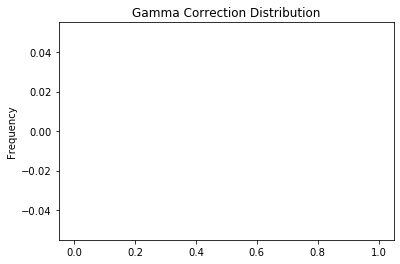

In [133]:
plot_gamma_data(gamma_dict)

## Gamma Correction Evaluation
evaluate the average gamma correction


In [134]:

# pprint(gamma_dict)
# df_gamma = pd.DataFrame(gamma_dict)
# print(df_gamma)

# df_gamma["gamma"].plot.hist(bins=5, alpha=0.5, title="Gamma Correction Distribution")

### Status Evaluation

In [135]:
# pprint(stage_dict)

for state in stage_dict.keys():
    print(stage_dict[state])
    if stage_dict[state]["FINISHED"] and stage_dict[state]["STARTED"]:
        state_duration = stage_dict[state]["FINISHED"] - stage_dict[state]["STARTED"]
        print(f"{state}: {state_duration}") 

{'STARTED': datetime.datetime(2021, 10, 27, 16, 51, 8), 'FINISHED': datetime.datetime(2021, 10, 27, 16, 51, 9)}
Initialisation: 0:00:01
{'STARTED': None, 'FINISHED': None}
{'STARTED': None, 'FINISHED': None}
{'STARTED': None, 'FINISHED': None}
{'STARTED': None, 'FINISHED': None}
{'STARTED': None, 'FINISHED': None}
{'STARTED': None, 'FINISHED': None}
{'STARTED': None, 'FINISHED': None}


C:\Users\Admin\Github\autoliftout\liftout\log\run\20211027.160458\sample.yaml
0.0029498878238866295 -0.003316875
0.0031833044916999495 -0.0032977916666666668


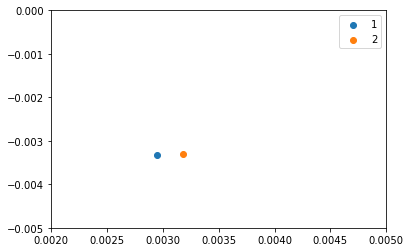

In [115]:
# TODO: read sample.yaml and plot the coordinates
log_dir = r"C:\Users\Admin\Github\autoliftout\liftout\log\run\20211027.160458"
yaml_file = os.path.join(log_dir, "sample.yaml")
print(yaml_file)

%matplotlib inline
import yaml
with open(yaml_file, 'r') as f:
    sample_yaml = yaml.safe_load(f)


for sample_no in sample_yaml["sample"].keys():
    lamella_coords = sample_yaml["sample"][sample_no]["lamella_coordinates"]
    x, y = lamella_coords["x"], lamella_coords["y"]
    print(x, y)
    plt.scatter(x, y, label=sample_no)

plt.legend(loc="best")
plt.ylim(-0.005, 0)
plt.xlim(0.002, 0.005)
# plt.scatter(plot_coords_x, plot_coords_y, label="hello")
plt.show()

# Extract data for labelling


In [49]:
from liftout.detection import utils

In [55]:
log_dir = os.path.dirname(os.path.dirname(log_path))
utils.extract_img_for_labelling(log_dir)

c:\users\admin\github\autoliftout\liftout\data\retrain
510 images found for relabelling
C:/Users\Admin\Github\autoliftout\liftout\log\run\20211027.082641\img\20211027.082641_label.tif 20211027.082641_label.tif
C:/Users\Admin\Github\autoliftout\liftout\log\run\20211027.082828\img\20211027.082829_label.tif 20211027.082829_label.tif
C:/Users\Admin\Github\autoliftout\liftout\log\run\20211027.083124\img\20211027.083125_label.tif 20211027.083125_label.tif
C:/Users\Admin\Github\autoliftout\liftout\log\run\20211027.083957\img\20211027.083957_label.tif 20211027.083957_label.tif
C:/Users\Admin\Github\autoliftout\liftout\log\run\20211027.084317\img\20211027.084317_label.tif 20211027.084317_label.tif
C:/Users\Admin\Github\autoliftout\liftout\log\run\20211027.085023\img\20211027.085023_label.tif 20211027.085023_label.tif
C:/Users\Admin\Github\autoliftout\liftout\log\run\20211027.090326\img\20211027.090326_label.tif 20211027.090326_label.tif
C:/Users\Admin\Github\autoliftout\liftout\log\run\20211027